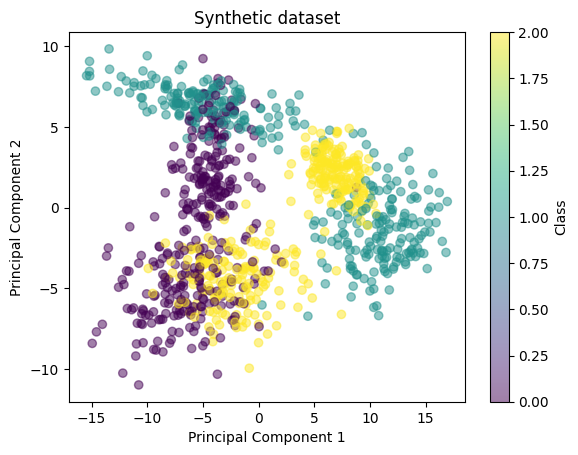

Synthetic dataset generated and saved as 'synthetic_dataset.csv'.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, 
                           n_redundant=2, n_clusters_per_class=2, 
                           n_classes=3, class_sep=3.0, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(10)])
df['class'] = y

# Save dataset
df.to_csv('synthetic_dataset.csv', index=False)

# Plot using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Synthetic dataset')
plt.colorbar(label='Class')
plt.show()

print("Synthetic dataset generated and saved as 'synthetic_dataset.csv'.")

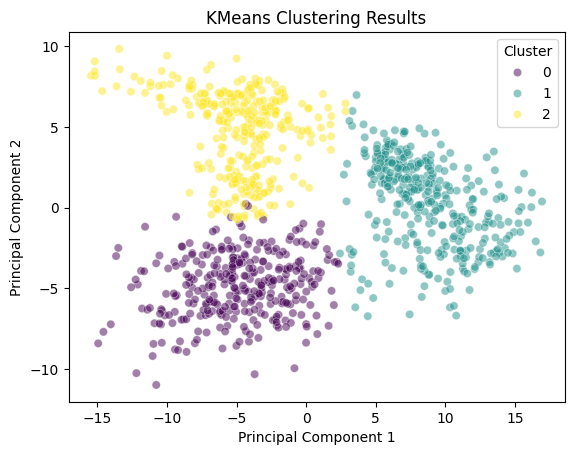

In [29]:
# Apply KMeans clustering
from sklearn.cluster import KMeans
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plot KMeans clustering results
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis', alpha=0.5)
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [30]:
import pandas as pd

## Cluster-based Feature Engineering

# Get distances of each point to the cluster centroids
distances = kmeans.transform(X)  # Returns (n_samples, n_clusters)

# Add distance features
X_distances = pd.DataFrame(distances, columns=[f'cluster_distance_{i}' for i in range(kmeans.n_clusters)])

# Convert numpy array X to DataFrame
X_df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])

# Concatenate with original dataset
X = pd.concat([X_df, X_distances], axis=1)

# Print the first few rows of the new dataset
print(X.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -1.922043  -0.270268   2.305725   0.641947   0.000185  -3.753479   
1   3.882358  -1.312163  -2.852371   0.382433   1.072373   2.659850   
2   3.989394  -1.132149  -3.825930   0.976431   0.833548   3.591064   
3   2.334309  -0.922189  -2.367614  -1.001315  -1.319080   3.721244   
4  -3.094173   0.008858  -2.262848   0.975823  -6.134415  -1.240804   

   feature_7  feature_8  feature_9  feature_10  cluster_distance_0  \
0   4.248180  -2.984763   2.312040   -3.207581           15.417773   
1  -5.865767   2.848211  -3.643698    2.822848           12.752650   
2  -7.228052   2.293855  -5.179645    4.566608           13.748953   
3  -2.322831   2.495273  -2.148973    1.046983           12.327318   
4  -4.549296  -2.106847   5.316572    2.926780            5.795772   

   cluster_distance_1  cluster_distance_2  
0            3.725554           15.942958  
1           15.982561            6.260866  
2           18.22084

In [41]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit the model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)
# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred1))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        65
           1       1.00      0.98      0.99        55
           2       0.95      0.96      0.96        80

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.96      0.97       200



Linear Regression Mean Squared Error:
0.7279486691269463


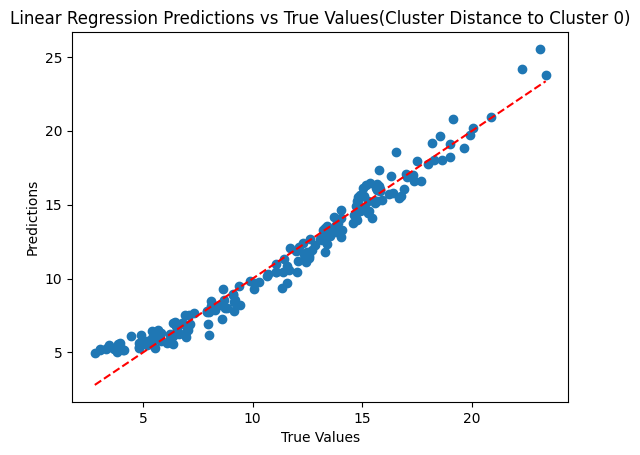

In [ ]:
## Model 2: Linear Regression
# Use distance features as target
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and fit the model
model2 = LinearRegression()
Y = X['cluster_distance_0']  # Use the distance to the first cluster as target
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['cluster_distance_0']), Y, test_size=0.2, random_state=42)
model2.fit(X_train, y_train)
# Make predictions
y_pred2 = model2.predict(X_test)
# Print mean squared error
print("Linear Regression Mean Squared Error:")
print(mean_squared_error(y_test, y_pred2))

# Plotting the results for linear regression
plt.scatter(y_test, y_pred2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Predictions vs True Values(Cluster Distance to Cluster 0)')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

